In [4]:
import pandas as pd

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
import rasterio as rio
import os

In [5]:
scene_list = pd.read_csv("scene_list.csv")

FileNotFoundError: [Errno 2] File b'scene_list.csv' does not exist: b'scene_list.csv'

In [15]:
scene_list

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
0,LC08_L1TP_149039_20170411_20170415_01_T1,LC81490392017101LGN00,2017-04-11 05:36:29.349932,0.00,L1TP,149,39,29.22165,72.41205,31.34742,74.84666,https://s3-us-west-2.amazonaws.com/landsat-pds...
1,LC08_L1TP_012001_20170411_20170415_01_T1,LC80120012017101LGN00,2017-04-11 15:14:40.001201,0.15,L1TP,12,1,79.51504,-22.06995,81.90314,-7.44339,https://s3-us-west-2.amazonaws.com/landsat-pds...
2,LC08_L1TP_012002_20170411_20170415_01_T1,LC80120022017101LGN00,2017-04-11 15:15:03.871058,0.38,L1TP,12,2,78.74882,-29.24387,81.14549,-15.04330,https://s3-us-west-2.amazonaws.com/landsat-pds...
3,LC08_L1TP_012010_20170411_20170415_01_T1,LC80120102017101LGN00,2017-04-11 15:18:14.918879,0.02,L1TP,12,10,69.67856,-56.04655,72.02949,-48.71678,https://s3-us-west-2.amazonaws.com/landsat-pds...
4,LC08_L1TP_012011_20170411_20170415_01_T1,LC80120112017101LGN00,2017-04-11 15:18:38.780265,10.65,L1TP,12,11,68.38187,-57.33186,70.76840,-51.13822,https://s3-us-west-2.amazonaws.com/landsat-pds...
5,LC08_L1TP_012019_20170411_20170415_01_T1,LC80120192017101LGN00,2017-04-11 15:21:49.747601,21.10,L1TP,12,19,57.55978,-66.08671,59.77420,-61.80908,https://s3-us-west-2.amazonaws.com/landsat-pds...
6,LC08_L1TP_012023_20170411_20170415_01_T1,LC80120232017101LGN00,2017-04-11 15:23:25.248212,0.02,L1TP,12,23,51.99026,-68.66168,54.18263,-65.24929,https://s3-us-west-2.amazonaws.com/landsat-pds...
7,LC08_L1TP_012026_20170411_20170415_01_T1,LC80120262017101LGN00,2017-04-11 15:24:36.887439,81.33,L1TP,12,26,47.77253,-70.39464,49.92658,-67.19278,https://s3-us-west-2.amazonaws.com/landsat-pds...
8,LC08_L1TP_012029_20170411_20170415_01_T1,LC80120292017101LGN00,2017-04-11 15:25:48.526665,43.39,L1TP,12,29,43.49926,-71.91725,45.65179,-68.88738,https://s3-us-west-2.amazonaws.com/landsat-pds...
9,LC08_L1TP_012030_20170411_20170415_01_T1,LC80120302017101LGN00,2017-04-11 15:26:12.404996,15.60,L1TP,12,30,42.06900,-72.38301,44.22652,-69.40886,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [ ]:
temp2 = row.download_url[:-10]
temp2 = temp2 + row['productId'] + '_B4.TIF'

In [ ]:
if corr == temp2:
    print('yayyy')
else:
    print(corr)
    print(temp2)

In [ ]:
fist_row = scene_list.iloc[0]

In [ ]:
wget.download('https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/149/039/LC08_L1TP_149039_20170411_20170415_01_T1/LC08_L1TP_149039_20170411_20170415_01_T1_B4.TIF')

In [19]:
df = pd.DataFrame(scene_list)

In [22]:
date = '2017-04-11'
tar_lat = 30
tar_lon = 30

In [59]:
def get_url(target, date, tar_lat, tar_lon):
    target = target[(target['min_lat'] < tar_lat) & (target['max_lat'] > tar_lat) & (target['min_lon'] < tar_lon) & (target['max_lon'] > tar_lon)]
    if len(target.index) < 1:
        return None, None, None
    
    target = target.iloc[0]

    url = target.download_url[:-10]
    band3_raw = url + target['productId'] + '_B3.TIF'
    band4_raw = url + target['productId'] + '_B4.TIF'
    mtl = url + target['productId'] + '_MTL.txt'
    return band3_raw, band4_raw, mtl

In [9]:
def get_day_time_location(data):
    return data[['acq_time', 'acq_date', 'latitude', 'longitude']]

In [10]:
data = pd.read_csv('./data/newest_data.csv')

In [11]:
fire_data = get_day_time_location(data)

In [15]:
fire_data[:5]

,acq_time,acq_date,latitude,longitude
0,1859,2019-04-25,53.1008,-108.1783
1,1925,2019-04-30,51.1757,-101.4211
2,612,2019-05-12,57.0703,-117.8925
3,2130,2019-05-12,57.0456,-117.8545
4,2130,2019-05-12,57.0506,-117.8640


In [13]:
with_dates = df[df['date'].isin(fire_data['acq_date'])]

NameError: name 'df' is not defined

In [60]:
url_df = []
target = df
for index, rows in fire_data.iterrows():
    band3_raw, band4_raw, mtl = get_url(target, rows[1], rows[2], rows[3])
    new_row = [band3_raw, band4_raw, mtl]
    url_df.append(new_row)

In [73]:
band3_raw, band4_raw, mtl = get_url(target, '2019-07-31', 59.3919, -104.7532)

In [66]:
url_dff = pd.DataFrame(url_df, columns = ['tf3', 'tf4', 'mtl'])

In [ ]:
temp_row = [band3_raw, band4_raw, mtl]
temp_df = pd.DataFrame(temp_row, columns = ['tf3', 'tf4', 'mtl'])

In [74]:
wget.download(band3_raw, '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')

KeyboardInterrupt: 

In [ ]:
for index, rows in temp_row.iterrows():
    wget.download(row[0], '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')
    wget.download(row[1], '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')
    wget.download(row[2], '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')

In [68]:
!pwd

/Users/melodylui/Projects/NASA-CSA-Hackathon


In [185]:
wget -P /Projects/spot-the-fire/downloaded_images url

SyntaxError: invalid syntax (<ipython-input-185-4dcf28a8c8df>, line 1)

In [124]:
!sentinelsat -u melodylui -p 7417417474741 -g search_polygon.geojson --sentinel 2 --cloud 30 --url https://scihub.copernicus.eu/dhus

Found 0 products
---
0 scenes found with a total size of 0.00 GB


In [30]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date as dt
from datetime import datetime  
from datetime import timedelta 

In [ ]:
for index, row in fire_data[500:510].iterrows():
    lat = row['latitude']
    long = row['longitude']
    date_str = row['acq_date'].replace('-', '')
    print(date_str)
    dat_obj = dt(int(date_str[:4]), int(date_str[4:6]), int(date_str[6:])) + timedelta(days=7) 
    
    geojson_geometry = {
      "type": "Polygon",
      "coordinates": [
        [
          [long+0.01,lat-0.01],
          [long+0.01,lat+0.01],
          [long-0.01,lat+0.01],
          [long-0.01,lat-0.01],
          [long+0.01,lat-0.01]
        ]
      ]
    }

    api = SentinelAPI('npaquin1', 'Tr00per123_123', 'https://scihub.copernicus.eu/dhus')

    footprint = geojson_to_wkt(geojson_geometry)
    products = api.query(footprint,
                         date=(date_str, dat_obj),
                         platformname='Sentinel-2'
                        )
    api.download_all(products)

20190530


Downloading: 100%|██████████| 958M/958M [05:06<00:00, 3.13MB/s] 
MD5 checksumming: 100%|██████████| 958M/958M [00:02<00:00, 423MB/s] 
Downloading: 100%|██████████| 797M/797M [04:14<00:00, 3.14MB/s] 
MD5 checksumming: 100%|██████████| 797M/797M [00:01<00:00, 408MB/s] 
Downloading: 100%|██████████| 896M/896M [04:47<00:00, 3.12MB/s] 
MD5 checksumming: 100%|██████████| 896M/896M [00:02<00:00, 366MB/s] 
Downloading: 100%|██████████| 660M/660M [03:30<00:00, 3.13MB/s] 
MD5 checksumming: 100%|██████████| 660M/660M [00:01<00:00, 464MB/s] 
Downloading: 100%|██████████| 909M/909M [03:51<00:00, 3.93MB/s]
MD5 checksumming: 100%|██████████| 909M/909M [00:02<00:00, 416MB/s] 
Downloading: 100%|██████████| 729M/729M [03:53<00:00, 3.13MB/s] 
MD5 checksumming: 100%|██████████| 729M/729M [00:02<00:00, 332MB/s] 


20190530
20190530


Downloading: 100%|██████████| 1.09G/1.09G [05:51<00:00, 3.10MB/s]
MD5 checksumming: 100%|██████████| 1.09G/1.09G [00:02<00:00, 452MB/s]
Downloading: 100%|██████████| 842M/842M [04:25<00:00, 3.18MB/s] 
MD5 checksumming: 100%|██████████| 842M/842M [00:01<00:00, 452MB/s] 
Downloading: 100%|██████████| 790M/790M [04:13<00:00, 3.12MB/s] 
MD5 checksumming: 100%|██████████| 790M/790M [00:01<00:00, 399MB/s] 
Downloading:   9%|▉         | 50.3M/572M [00:12<02:34, 3.38MB/s]

In [ ]:
products_df = api.to_geodataframe(products)

# GeoJSON FeatureCollection containing footprints and metadata of the scenes
api.to_geojson(products)

# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
api.to_geodataframe(products)



In [184]:
R10 = 'S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_20151222T180749.SAFE/GRANULE/L1C_T13VEE_A002612_20151222T180749/IMG_DATA'
b4 = rio.open(R10+'/T13VEE_20151222T180752_B04.jp2')
b3 = rio.open(R10+'/T13VEE_20151222T180752_B03.jp2')
b2 = rio.open(R10+'/T13VEE_20151222T180752_B02.jp2')

In [185]:
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [188]:
# Open b4 and b8
b4 = rio.open(R10+'/T13VEE_20151222T180752_B04.jp2')
b8 = rio.open(R10+'/T13VEE_20151222T180752_B08.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

/Users/melodylui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/melodylui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [195]:
import matplotlib.pyplot as plt
def display_ndvi(ndvi_arr):
    im = plt.imshow(ndvi_arr)
    plt.colorbar(im)

In [198]:
dataset = rio.open('NDVI.tif')

In [201]:
band1 = dataset.read(1)

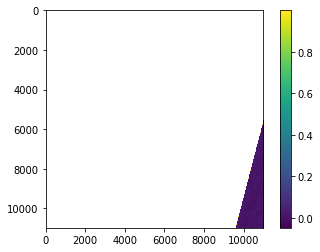

In [202]:
display_ndvi(band1)

In [180]:
products_df

,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,...,size,tileid,hv_order_tileid,filename,identifier,uuid,level1cpdiidentifier,granuleidentifier,datastripidentifier,geometry
11e92a7f-a96a-4bf7-a1ab-1c9436c01209,S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-12-22T18:07:52.029Z, Instrument: MS...",2015-12-22 18:07:52.029,2015-12-22 18:07:52.029,2015-12-22 18:07:52.029,2019-01-09 21:35:25.719,2612,...,28.45 MB,13VEE,VE13E,S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_2...,S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_2...,11e92a7f-a96a-4bf7-a1ab-1c9436c01209,S2A_OPER_MSI_L1C_TL_MTI__20151222T194620_A0026...,S2A_OPER_MSI_L1C_TL_MTI__20151222T194620_A0026...,S2A_OPER_MSI_L1C_DS_MTI__20151222T194620_S2015...,"(POLYGON ((-103.1609884 57.64107973, -103.1094..."


In [ ]:
# Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# its download url
api.get_product_odata(<product_id>)

# Get the product's full metadata available on the server
api.get_product_odata(<product_id>, full=True)

In [208]:
geojson_geometry = {
  "type": "Polygon",
  "coordinates": [
    [ 
      [-104.7061,58.4088],
      [-104.7061,59.4988],
      [-104.7961,59.4988],
      [-104.7961,58.4088],
      [-104.7061,58.4088]
    ]
  ]
}

In [95]:

# # get images that overlap with our AOI 
# geometry_filter = {
#   "type": "GeometryFilter",
#   "field_name": "geometry",
#   "config": geojson_geometry
# }

# # get images acquired within a date range
# date_range_filter = {
#   "type": "DateRangeFilter",
#   "field_name": "acquired",
#   "config": {
#     "gte": "2016-08-31T00:00:00.000Z",
#     "lte": "2016-09-01T00:00:00.000Z"
#   }
# }

# # only get images which have <50% cloud coverage
# cloud_cover_filter = {
#   "type": "RangeFilter",
#   "field_name": "cloud_cover",
#   "config": {
#     "lte": 0.5
#   }
# }

# # combine our geo, date, cloud filters
# combined_filter = {
#   "type": "AndFilter",
#   "config": [geometry_filter, date_range_filter, cloud_cover_filter]
# }

In [100]:
# import os
# import json
# import requests
# from requests.auth import HTTPBasicAuth

# # API Key stored as an env variable
# PLANET_API_KEY = os.getenv('0ca23c1d50b4446cac5b0ce8def2aa3b') # replace PL_API_KEY with Planet API key in quotes

# item_type = "PSScene4Band"

# # API request object
# search_request = {
#   "interval": "day",
#   "item_types": [item_type], 
#   "filter": combined_filter
# }

# # fire off the POST request
# search_result = \
#   requests.post(
#     'https://api.planet.com/data/v1/quick-search',
#     auth=HTTPBasicAuth(PLANET_API_KEY, ''),
#     json=search_request)

# print(json.dumps(search_result.json(), indent=1))

In [99]:
# links = result.json()[u"analytic"]["_links"]
# self_link = links["_self"]
# activation_link = links["activate"]

# # Request activation of the 'analytic' asset:
# activate_result = \
#   requests.get(
#     activation_link,
#     auth=HTTPBasicAuth(PLANET_API_KEY, '')
#   )
  
# activation_status_result = \
#   requests.get(
#     self_link,
#     auth=HTTPBasicAuth(PLANET_API_KEY, '')
#   )
    
# print(activation_status_result.json()["status"])

In [93]:
# download_link = activation_status_result.json()["location"]
# print(download_link)

NameError: name 'activation_status_result' is not defined

In [102]:
geo_json_geometry = {
  "type": "Polygon",
  "coordinates": [
    [
      [
        -122.52227783203125,
        40.660847697284815
      ],
      [
        -122.52227783203125,
        40.987154933797335
      ],
      [
        -122.01690673828124,
        40.987154933797335
      ],
      [
        -122.01690673828124,
        40.660847697284815
      ],
      [
        -122.52227783203125,
        40.660847697284815
      ]
    ]
  ]
}